In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
traindata = np.loadtxt('train_in.csv', delimiter=',')
trainlabels = np.genfromtxt('train_out.csv', delimiter=',')

testdata = np.genfromtxt('test_in.csv', delimiter=',')
testlabels = np.genfromtxt('test_out.csv', delimiter=',')

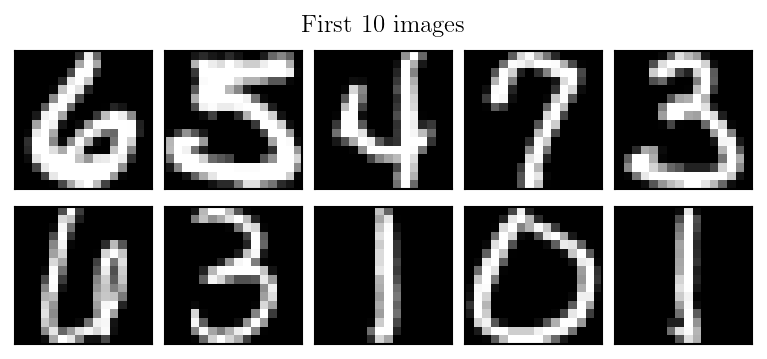

In [30]:
# Preview the first 10 images in the dataset

images = traindata[:11]
labels = trainlabels[:11]
fig, axes = plt.subplots(2,5, figsize=[5,2.3], layout='constrained')


for im, ax, label in zip(images, axes.reshape(1,10)[0], labels):
    ax.imshow(im.reshape(16,16), cmap='binary_r')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlabel(int(label))

fig.suptitle("First 10 images")
plt.savefig("reportfigs/firstdigits.pdf")


In [9]:
centers = np.zeros((10, 256))

for digit in range(10):
    images = traindata[trainlabels==digit]
    center = np.mean(images, axis=0)
    centers[digit, :] = center


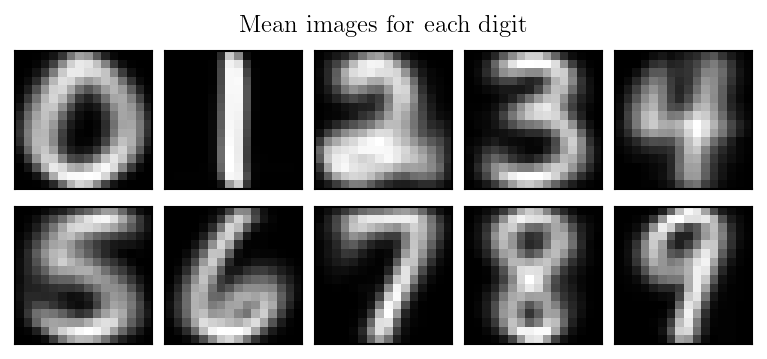

In [31]:
# Plot mean images for each number:
fig, axes = plt.subplots(2,5, figsize=[5,2.3], layout='constrained')

for im, ax in zip(centers, axes.reshape(1,10)[0]):
    ax.imshow(im.reshape(16,16), cmap='binary_r')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("Mean images for each digit")
plt.savefig("reportfigs/meandigits.pdf")


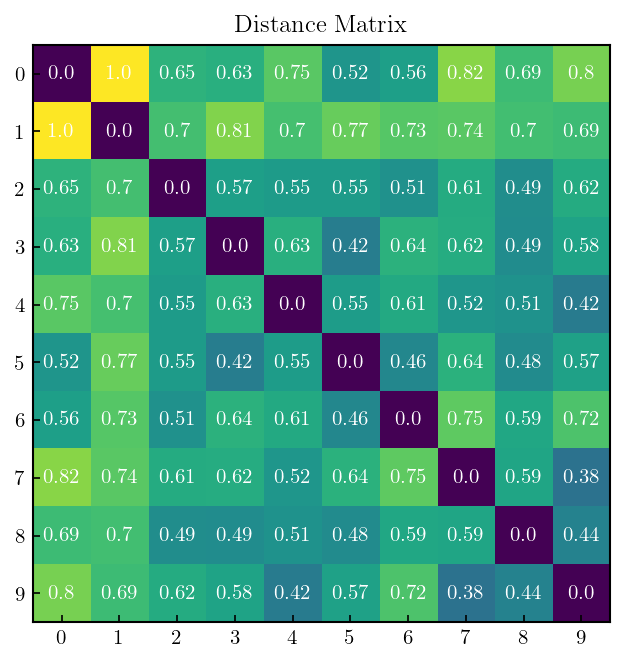

In [12]:
distance_matrix = np.zeros((10,10))
for (i,j), _ in np.ndenumerate(distance_matrix):
    distance_matrix[i,j] = np.linalg.norm(centers[i] - centers[j])

distance_matrix /= np.max(distance_matrix)
# print(distance_matrix)
fig, ax = plt.subplots(1,1, figsize=[5,5], dpi=150)
ax.imshow(distance_matrix, cmap='viridis')

for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(distance_matrix[i, j],2),
                       ha="center", va="center", color="w")
ax.grid(False)
ax.set_xticks(ticks=range(10), labels=range(10))
ax.set_yticks(ticks=range(10), labels=range(10))
ax.set_title("Distance Matrix")
plt.savefig("reportfigs/distance_matrix.pdf")

We see that (7,9), (4,9), and (3,5) are most difficult to separate, as their distances are lowest.

pcaing
[23.56789668 11.26144106]
umapping
tsneing


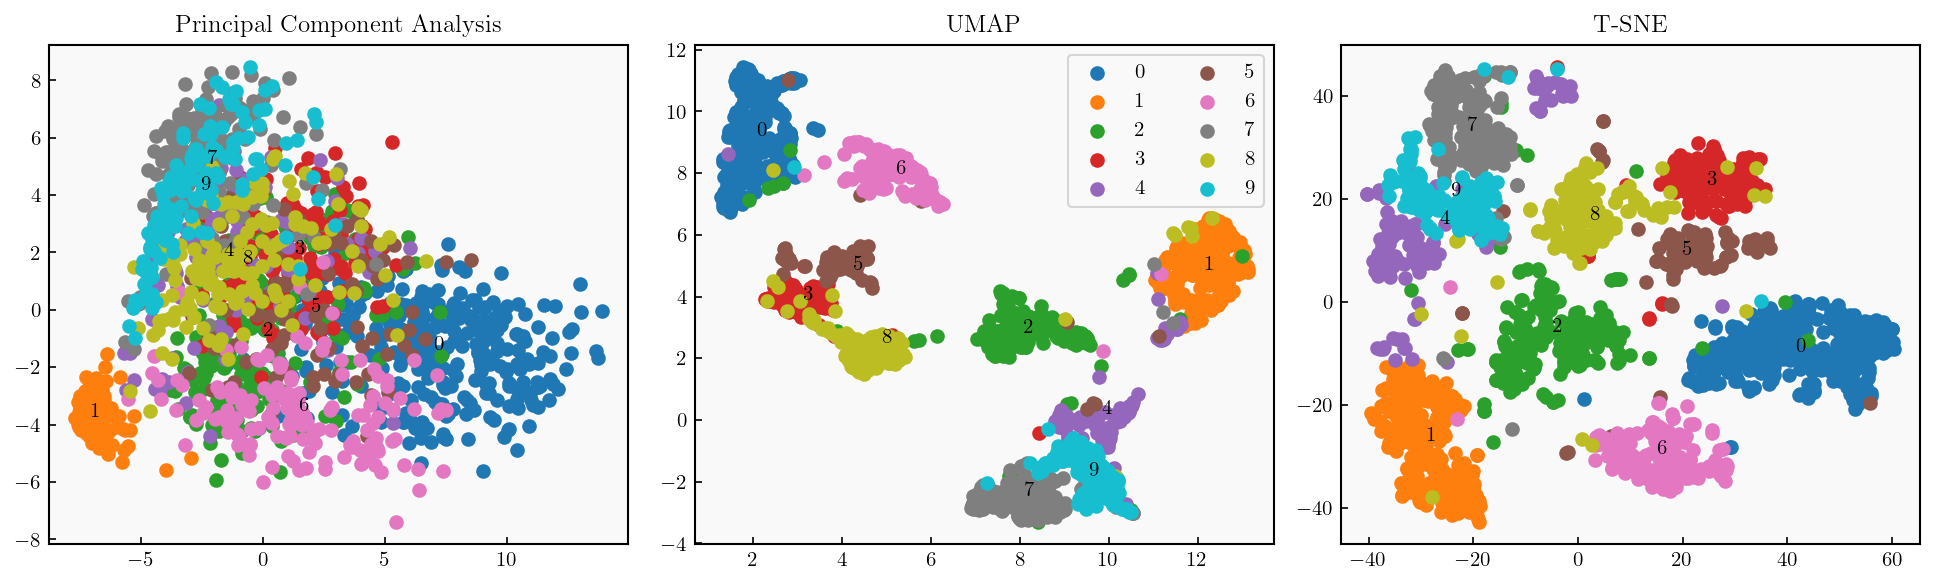

In [13]:
from sklearn.decomposition import PCA
print("pcaing")
pca = PCA(n_components=2)
fit = pca.fit_transform(traindata)
print(pca.explained_variance_)

fig, (ax_pca, ax_umap, ax_tsne) = plt.subplots(1,3, figsize=[13,4], dpi=150, layout='tight')
plt.subplots_adjust(wspace=.1)
ax = ax_pca

for digit in range(10):
    plotfit = fit[trainlabels==digit]
    ax.scatter(plotfit[:,0], plotfit[:,1], label=str(digit), )
    ax.text(s=str(digit), x=np.mean(plotfit[:,0]), y=np.mean(plotfit[:,1]),  zorder=10)

ax.set_title("Principal Component Analysis")


import umap
print("umapping")

ump = umap.UMAP(n_components=2)
fit = ump.fit_transform(traindata)
ax = ax_umap

for digit in range(10):
    plotfit = fit[trainlabels==digit]
    ax.scatter(plotfit[:,0], plotfit[:,1], label=str(digit), )
    ax.text(s=str(digit), x=np.mean(plotfit[:,0]), y=np.mean(plotfit[:,1]),  zorder=10)

ax.legend(ncols=2)
ax.set_title("UMAP")


from sklearn.manifold import TSNE
print("tsneing")
tsne = TSNE(n_components=2)
fit = tsne.fit_transform(traindata)
ax = ax_tsne

for digit in range(10):
    plotfit = fit[trainlabels==digit]
    ax.scatter(plotfit[:,0], plotfit[:,1], label=str(digit), )
    ax.text(s=str(digit), x=np.mean(plotfit[:,0]), y=np.mean(plotfit[:,1]),  zorder=10)

ax.set_title("T-SNE")
plt.savefig("reportfigs/dimreduction.pdf")

In [16]:
predictions_nmc = np.zeros_like(testlabels)

for i, image in enumerate(testdata):
    predictions_nmc[i] = np.argmin([np.linalg.norm(image - center) for center in centers])

correct_ratio = np.count_nonzero(testlabels==predictions_nmc)/len(testlabels)
print(f"correct: {correct_ratio:.2%}")

correct: 80.40%


In [24]:
from sklearn.neighbors import KNeighborsClassifier

def get_ratio(n_neighbors):
    nbors = KNeighborsClassifier(n_neighbors=n_neighbors)
    nbors.fit(traindata, trainlabels)

    predictions = nbors.predict(testdata)

    return np.count_nonzero(predictions == testlabels)/len(predictions)


for n in range(1,10):
    print(f"{n}: {get_ratio(n_neighbors=n):.2%}")

1: 91.50%
2: 89.80%
3: 91.40%
4: 90.20%
5: 90.80%
6: 90.90%
7: 90.20%
8: 90.20%
9: 89.50%


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

nbors = KNeighborsClassifier(n_neighbors=1)
nbors.fit(traindata, trainlabels)

predictions_knn = nbors.predict(testdata)

cm_nmc = confusion_matrix(testlabels, predictions_nmc, )
cm_knn = confusion_matrix(testlabels, predictions_knn, )


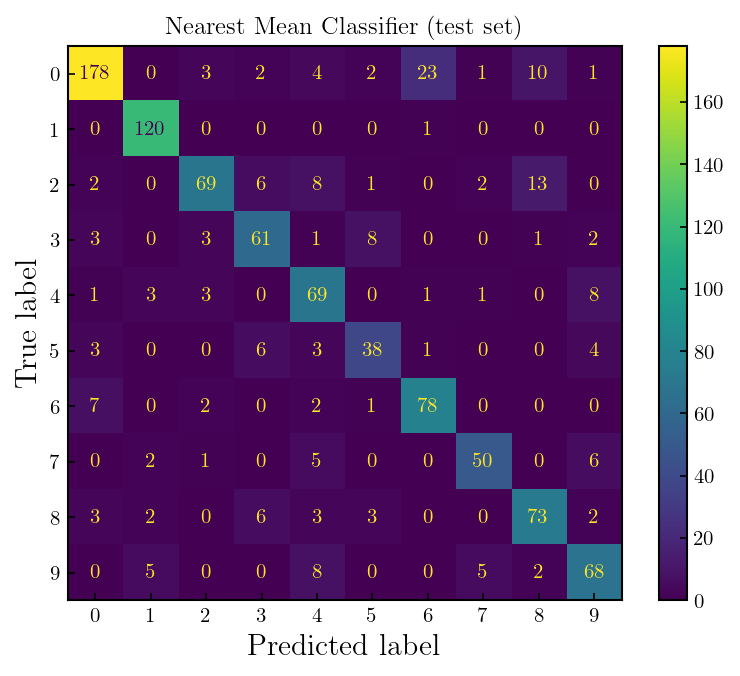

In [27]:
dsp = ConfusionMatrixDisplay(cm_nmc)
dsp.plot()
plt.title("Nearest Mean Classifier (test set)")
plt.savefig("reportfigs/confusion_nmc.pdf")


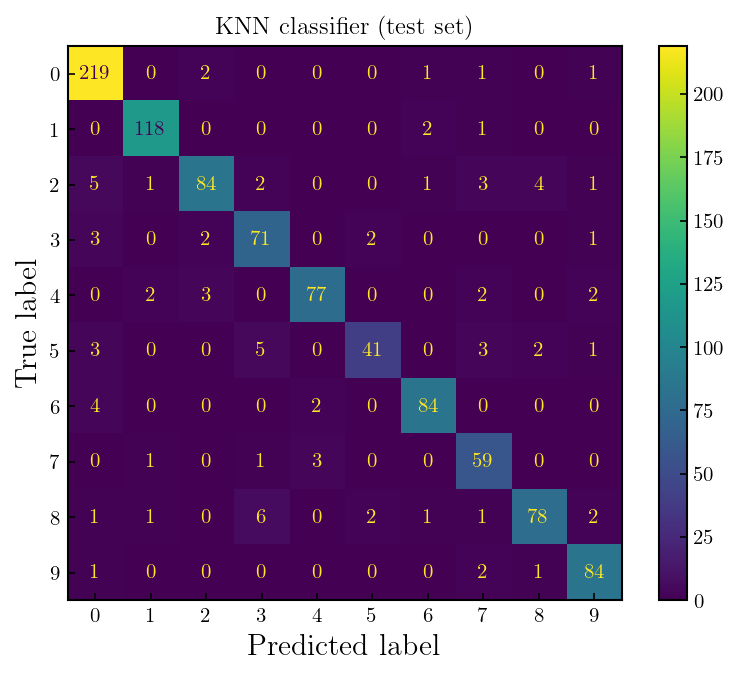

In [26]:
dsp = ConfusionMatrixDisplay(cm_knn)
dsp.plot()
plt.title("KNN classifier (test set)")
plt.savefig("reportfigs/confusion_knn.pdf")